In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
df = pd.read_pickle('final_arr_4.pkl')
df = df[(df['N'] > 4) & (df['M'] > 4)].reset_index(drop=True)
df

,M,N,mean_initial_dist,mean_final_dist,mean_RI,std_RI
0,5,5,0.055245,0.032749,40.720147,0.048226
1,5,6,0.070209,0.065533,6.660685,0.044329
2,5,7,0.081755,0.085113,-4.107922,0.043577
3,5,8,0.084478,0.087700,-3.814929,0.030403
4,5,9,0.097004,0.105628,-8.889570,0.034379
...,...,...,...,...,...,...
59,12,8,0.340125,0.259234,23.782740,0.050844
60,12,9,0.338119,0.276558,18.207138,0.044911
61,12,10,0.338652,0.288813,14.716842,0.033616
62,12,11,0.336178,0.297320,11.558677,0.026578


In [3]:
RI = np.array(df['mean_RI']).reshape([8,8])
ID = np.array(df['mean_initial_dist']).reshape([8,8])
FD = np.array(df['mean_final_dist']).reshape([8,8])

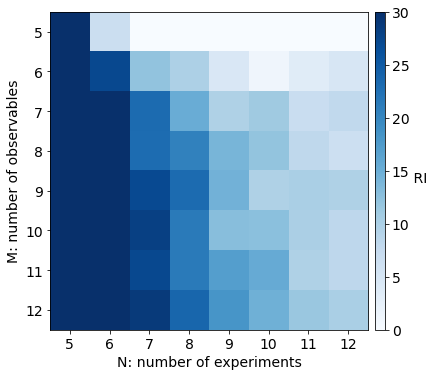

In [4]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
arr = RI[:,:]
im = ax.imshow(arr, cmap='Blues', vmin=0, vmax=30)
ax.set_xticks(np.arange(0,arr.shape[1]))
ax.set_yticks(np.arange(0,arr.shape[0]))
ax.set_xticklabels(5+np.arange(0,arr.shape[1]))
ax.set_yticklabels(5+np.arange(0,arr.shape[0]));
ax.set_xlabel('N: number of experiments')
ax.set_ylabel('M: number of observables');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax)
cax.set_ylabel('   RI', rotation=0);

## Functions of M

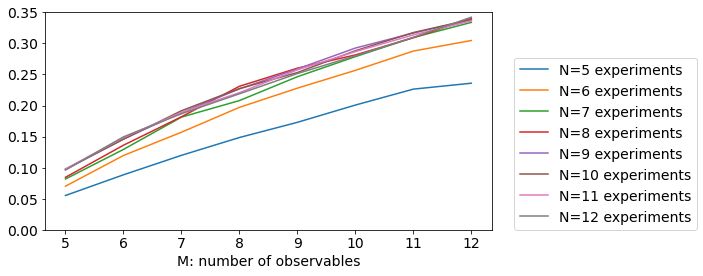

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(ID[:,i], label='N=%d experiments' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_ylim([0,0.35])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));

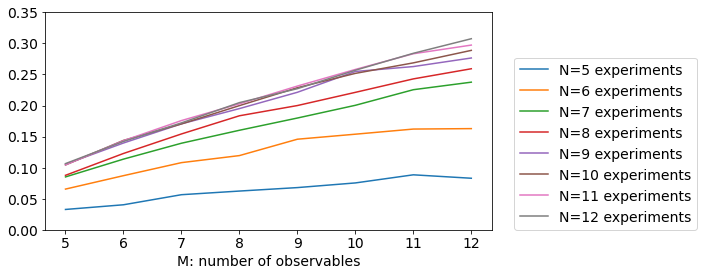

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(FD[:,i], label='N=%d experiments' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_ylim([0,0.35])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));

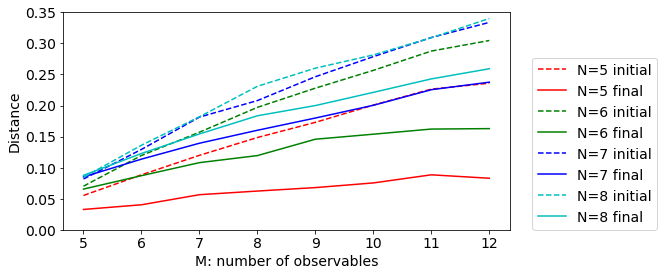

In [7]:
colors = ['r', 'g', 'b', 'c', 'm', 'y','gray','k']
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(ID[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+5))
    ax.plot(FD[:,i], ls='-', color=colors[i], label='N=%d final' %(i+5))
ax.legend(loc=[1.05,0]);
ax.set_ylim([0,0.35])
ax.set_ylabel('Distance')
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));

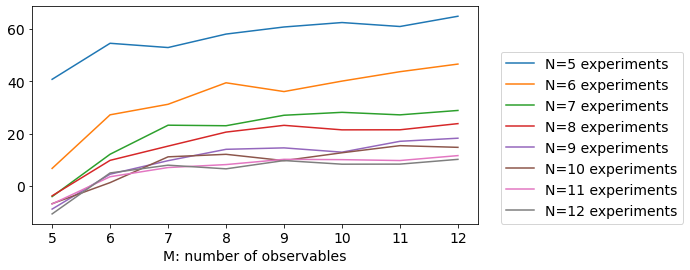

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(RI[:,i], label='N=%d experiments' %(i+5))
ax.legend(loc=[1.05,0])
#ax.set_ylim(0,0.7);
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(0,8));

## Different normalization

In [9]:
df

,M,N,mean_initial_dist,mean_final_dist,mean_RI,std_RI
0,5,5,0.055245,0.032749,40.720147,0.048226
1,5,6,0.070209,0.065533,6.660685,0.044329
2,5,7,0.081755,0.085113,-4.107922,0.043577
3,5,8,0.084478,0.087700,-3.814929,0.030403
4,5,9,0.097004,0.105628,-8.889570,0.034379
...,...,...,...,...,...,...
59,12,8,0.340125,0.259234,23.782740,0.050844
60,12,9,0.338119,0.276558,18.207138,0.044911
61,12,10,0.338652,0.288813,14.716842,0.033616
62,12,11,0.336178,0.297320,11.558677,0.026578


In [10]:
IDN = np.array(df['mean_initial_dist'] / np.sqrt(df['M'])).reshape([8,8])
FDN = np.array(df['mean_final_dist'] / np.sqrt(df['M'])).reshape([8,8])

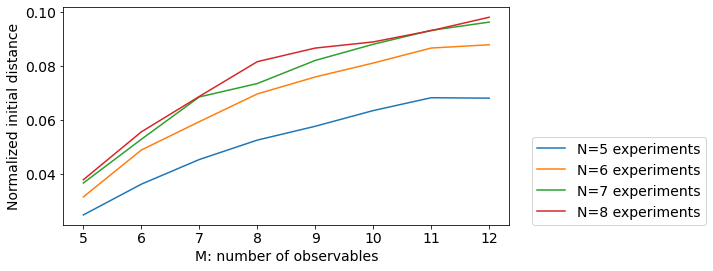

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[:,i], label='N=%d experiments' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

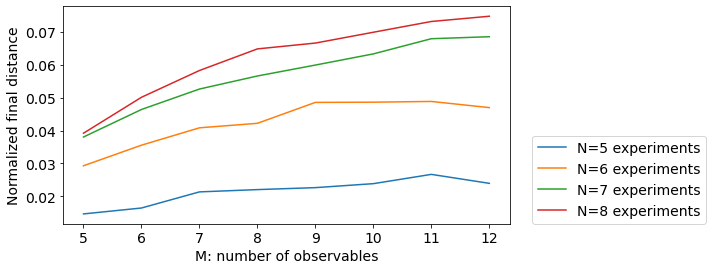

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[:,i], label='N=%d experiments' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized final distance');

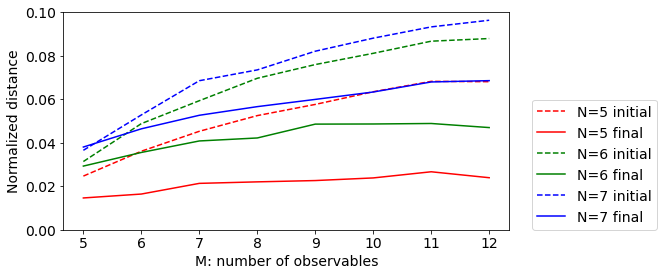

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+5))
    ax.plot(FDN[:,i], ls='-', color=colors[i], label='N=%d final' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized distance');

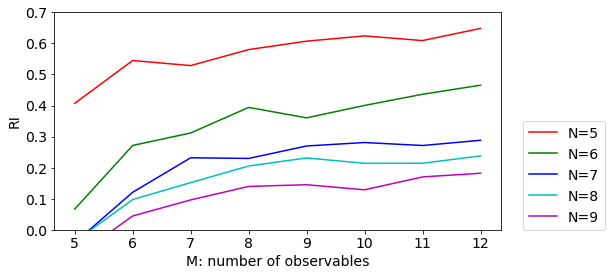

In [14]:
# Relative improvement is identical to the initial norm

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(5):
    ax.plot((IDN[:,i]-FDN[:,i])/IDN[:,i], ls='-', color=colors[i], label='N=%d' %(i+5))
    #ax.plot(RI[:,i]/100, ls='-', color=colors[i], label='N=%d' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
ax.set_ylim(0.0,0.7);
ax.set_ylabel('RI');

## Functions of N

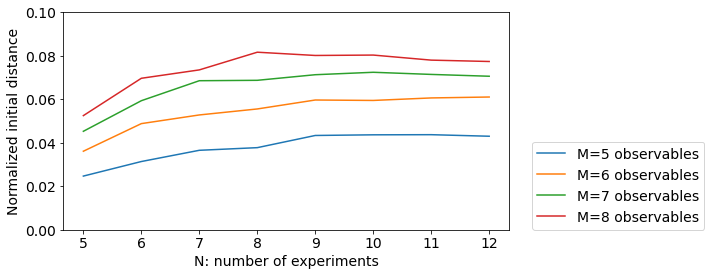

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[i], label='M=%d observables' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

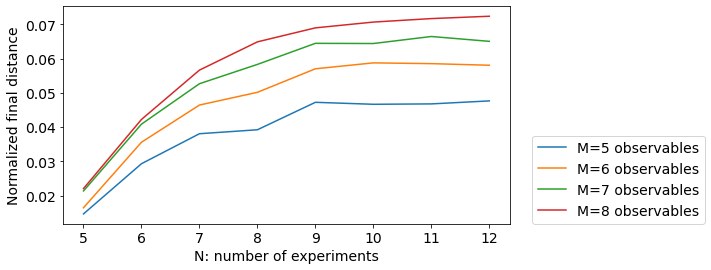

In [16]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[i], label='M=%d observables' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized final distance');

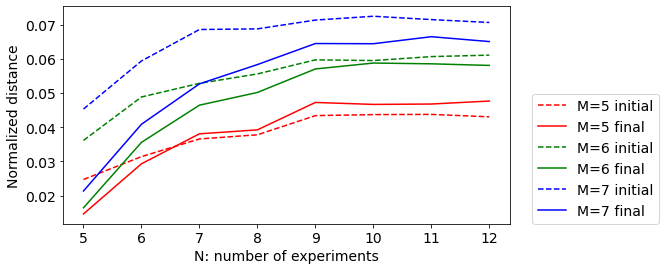

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[i], ls='--', color=colors[i], label='M=%d initial' %(i+5))
    ax.plot(FDN[i], ls='-', color=colors[i], label='M=%d final' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
#ax.set_ylim(0.02,0.08);
ax.set_ylabel('Normalized distance');

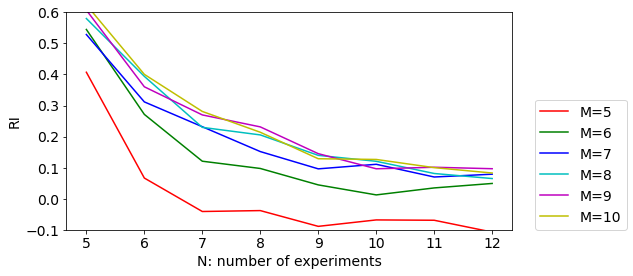

In [18]:
# Relative improvement

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(6):
    ax.plot((IDN[i]-FDN[i])/IDN[i], ls='-', color=colors[i], label='M=%d' %(i+5))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(5+np.arange(8));
ax.set_ylim(-0.1,0.6);
ax.set_ylabel('RI');